In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')

In [3]:
y_train_data = train_data['Survived']
x_train_data = train_data[['PassengerId','Sex' ,'Pclass','Age','SibSp','Parch','Fare','Embarked']]
x_test_data= test_data[['PassengerId','Sex' ,'Pclass','Age','SibSp','Parch','Fare','Embarked']]
x_train_data.head()

,PassengerId,Sex,Pclass,Age,SibSp,Parch,Fare,Embarked
0,1,male,3,22.0,1,0,7.2500,S
1,2,female,1,38.0,1,0,71.2833,C
2,3,female,3,26.0,0,0,7.9250,S
3,4,female,1,35.0,1,0,53.1000,S
4,5,male,3,35.0,0,0,8.0500,S


# Preprocessing

In [4]:

# check which columns have null in them and replace them with the mean or mode depending on the data
x_train_data.isnull().sum() # result: Age has 177, Embareked 2
col_mean = x_train_data.mean(axis=0)
col_mode = x_train_data.mode(axis=0).iloc[0]
x_train_data['Age'].fillna(col_mean['Age'], inplace=True)
x_train_data['Embarked'].fillna(col_mode['Embarked'], inplace=True)
x_train_data.isnull().sum() # double check if problem of null is solved

# family sumation and better understanding
x_train_data['Family']=x_train_data['SibSp']+x_train_data['Parch']
x_train_data.drop(columns=['SibSp','Parch'],inplace=True)
x_train_data
def family(x):
    if x <=1:
        return 'Single'
    elif x == 2:
        return 'Couple'
    else:
        return 'Group'
x_train_data['Family']=x_train_data['Family'].apply(family)
x_train_data

# one hot encoding:
x_train_data = pd.get_dummies(x_train_data, columns=['Sex','Pclass','Embarked','Family'])

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [5]:
# do same for test_data:
# check which columns have null in them and replace them with the mean or mode depending on the data
x_test_data.isnull().sum() # result: Age has 177, Embareked 2
col_mean = x_test_data.mean(axis=0)
col_mode = x_test_data.mode(axis=0).iloc[0]
x_test_data['Age'].fillna(col_mean['Age'], inplace=True)
x_test_data['Fare'].fillna(col_mean['Fare'], inplace=True)
x_test_data['Embarked'].fillna(col_mode['Embarked'], inplace=True)
x_test_data.isnull().sum() # double check if problem of null is solved

# family sumation and better understanding
x_test_data['Family']=x_test_data['SibSp']+x_test_data['Parch']
x_test_data.drop(columns=['SibSp','Parch'],inplace=True)
x_test_data

x_test_data['Family']=x_test_data['Family'].apply(family)
x_test_data

# one hot encoding:
x_test_data = pd.get_dummies(x_test_data, columns=['Sex','Pclass','Embarked','Family'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [6]:
# turn data from df to npArray
x_train = np.array(x_train_data)
y_train = np.array(y_train_data)
x_test = np.array(x_test_data)

In [7]:
bias = np.ones((1,891)).T
x_train = np.concatenate((bias,x_train),axis=1)
y_train = y_train.reshape((891,1))
no_features = np.shape(x_train)[1]
no_features

15

In [8]:
bias_test = np.ones((1,418)).T
x_test = np.concatenate((bias_test,x_test),axis=1)

In [9]:
theta = np.random.randn(no_features,1)
x_train.shape

(891, 15)

# Logistic Regression

In [10]:
def h(theta, x):
    return 1/(1+np.exp(-(x@theta)))

def loss(theta,x,y):
    eps = 1e-5
    return -1/len(x)*(y.T@np.log(np.abs(h(theta,x))+eps)+((1-y).T@np.log(np.abs(1-h(theta,x))+eps)))


In [11]:
epoch = 600
lr=1e-4
losses = []
for epoc in range(epoch):
    predictions = h(theta,x_train)
    grad=x_train.T@(predictions-y_train)
    theta-=(lr/len(y_train))*grad
    epoc_loss = loss(theta,x_train,y_train)
    losses.append(epoc_loss)
    
        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


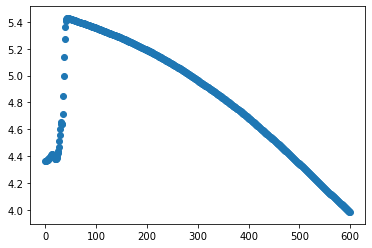

In [12]:
plt.scatter([i for i in range(epoch)],losses)

In [13]:
predicted = h(theta,x_test)
predicted = np.where(predicted>0.5,1,0)
ans_serie = pd.Series(predicted.reshape(predicted.shape[0]))
df = pd.DataFrame({'PassengerId' : test_data["PassengerId"] ,"Survived" : ans_serie})
df.set_index('PassengerId', inplace=True)
df.to_csv(current_dir+r'/out.csv')
df

,Survived
PassengerId,
892,0
893,1
894,1
895,0
896,0
...,...
1305,0
1306,0
1307,0


# Sklearn Implementation

In [14]:
# sklearn:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
predicted = clf.predict(x_test)
ans_serie = pd.Series(predicted.reshape(predicted.shape[0]))
df = pd.DataFrame({'PassengerId' : test_data["PassengerId"] ,"Survived" : ans_serie})
df.set_index('PassengerId', inplace=True)
df.to_csv(current_dir+r'/out.csv')
df

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
